# CSE351 HW3
## June 28th at 11:59 pm
Stock market prediction
1.  Download HW3 data from the folder data in Documents on Blackboard, which lists daily signal and price values of S&P 500.


	
2.  The aim of this project is to test a data source (signal, second column in data.csv) which claims to be predictive of future returns of the SP500 index (spy_close_price, third column in data.csv).  We use SPY (SPDR S&P 500 ETF) as a proxy for the SP500 index. 



3.  The signal and spy_close_price are both received at the same time at the end of the day on the date listed in column 1.  We do not know how the signal is generated or have a prior conviction about the forecast horizon over which the signal is supposed to be effective, nor its stationarity. 




4.  The first step in this endeavor is data cleaning.  Assume all values in data.csv are potentially suspect, and please identify any errors in the data, flag them with a note, and suggest a corrected value or if advisable, you may choose to ignore them for purposes of your analysis.  Please explain what types of analysis you did to identify the errors, and provide any assumptions/intuition/formulas/scripts you may have used to help you find them.



5.  Given the cleaned/censored version of the data you created in (4), please perform an analysis of the predictive power of signal with respect to spy_close_price.  This analysis must be based on linear regression. report the performace of linear regression model, scatter plots befor and after clearning the data. and explain if the signal can be a good predictive for the stock price. Also compute the correlation between the signal and price.


Please document all experiment(s) you performed (including relevant code, package references, etc) and summarize your conclusions about the viability and shortcomings of this signal as a predictor of spy_close_price, including any materials you feel are appropriate to support your conclusions (eg, graphs, tables, etc).  Use this jupyter notebook file.




In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
#  reading the csv file.
filename = 'HW3_data.csv'
raw_data = pd.read_csv(filename)

# if there are any NaN values, I am filling them with the mean of the data.
raw_data = raw_data.fillna(raw_data.mean())


In [3]:
# total number of data present in the raw file that we read. 
print("raw_data_rows = ",raw_data.shape[0])
print("\n number of null values in the raw data: \n")
print(raw_data.isnull().sum())


raw_data_rows =  667

 number of null values in the raw data: 

date               0
signal             0
spy_close_price    0
dtype: int64


Text(0, 0.5, 'Spy_close_price')

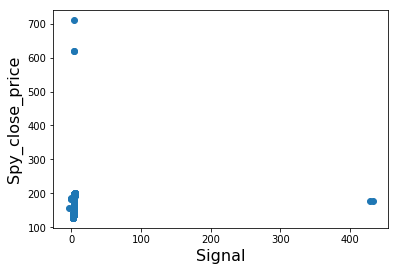

In [4]:
# plotting a graph with the raw data that we obtained.

x = raw_data.iloc[:, :2].drop(['date'], axis = 1)
y = raw_data.iloc[:, :3].drop(['date', 'signal'], axis = 1)
plt.scatter(x, y)
plt.xlabel('Signal', fontsize = 16)
plt.ylabel("Spy_close_price", fontsize = 16)

# print(y.shape)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
from sklearn import metrics

mse_val = metrics.mean_squared_error(y_test,lr.predict(X_test))
print("MSE value of the uncleaned data: ", mse_val)


MSE value of the uncleaned data:  1704.94522399558


In [7]:
y_pred = lr.predict(X_test)

uncleaned_r2score = r2_score(y_test, y_pred)
print("R2 score of uncleaned data: ", uncleaned_r2score)


R2 score of uncleaned data:  -0.0007425711562483173


In [8]:
print("Correlation coefficient of the uncleaned data: ", lr.coef_[0])


Correlation coefficient of the uncleaned data:  [0.04816833]


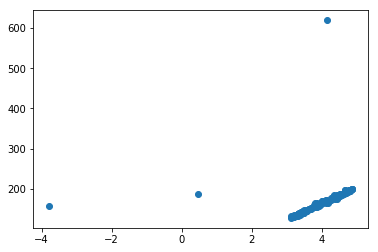

In [9]:
plt.scatter(X_test, y_test)
# plt.plot(X_test, y_pred, color='black', markerfacecolor = 'red', marker = 'o')

plt.show()

*****************************************************************************************
:
: Cleaning up of the data
:
*****************************************************************************************

In [10]:
# Identifying the outliers.
q1 = raw_data.quantile(0.25)
q3 = raw_data.quantile(0.75)

iqr = q3-q1

lq = q1 - 1.5 * iqr
hq = q3 + 1.5 * iqr

# dropping the outliers 
outliers = ((raw_data < lq) | (raw_data > hq))
unoutlied_data = raw_data[~outliers.any(axis=1)]

print("cleaned data number of rows: ", unoutlied_data.shape[0])
print("\nThe outliers are:\n")
print(raw_data[outliers.any(axis=1)])

# we drop the outliers from the existing table and proceed further.


cleaned data number of rows:  658

The outliers are:

         date      signal  spy_close_price
303  20130326   -3.802670         156.1900
421  20130912    4.193204         618.9500
422  20130913    4.143689         619.3300
423  20130916    4.124515         710.3100
459  20131105  429.514563         176.2700
460  20131106  432.961165         177.1700
570  20140414    0.004560         182.9401
571  20140415    0.454976         184.2000
572  20140416    0.455898         186.1250


In [11]:
# normalizing the data 
date = unoutlied_data.iloc[:, 1]
drpdata = unoutlied_data.drop(['date'], axis=1)
# print(drpdata)

normalized_data = (drpdata - drpdata.mean())/drpdata.std()
# normalized_data


Text(0, 0.5, 'Spy_close_price')

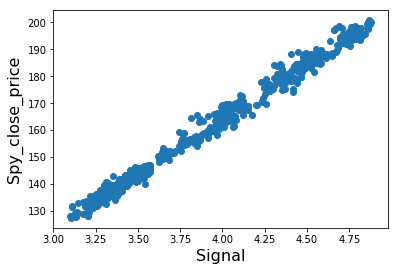

In [12]:
# segregating x and y values for the graph
cdata = unoutlied_data
b = cdata.iloc[:, :2].drop(['date'], axis=1)
c = cdata.iloc[:, :3].drop(['date','signal'], axis=1)


# plotting the cleaned up data
plt.scatter(b, c)
plt.xlabel('Signal', fontsize=16)
plt.ylabel('Spy_close_price', fontsize=16)


In [13]:

# train splitting
b_train, b_test, c_train, c_test = train_test_split(b, c, random_state = 0)
lr = LinearRegression()

lr.fit(b_train, c_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The value of MSE when the data is normalized changes. The value is as follows.


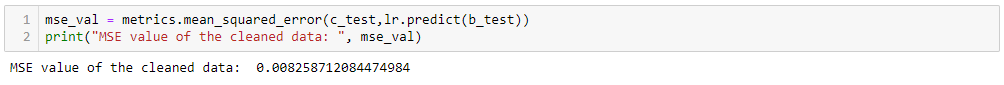

In [14]:
mse_val = metrics.mean_squared_error(c_test,lr.predict(b_test))
print("MSE value of the unnormalized data: ", mse_val)


MSE value of the unnormalized data:  3.8134450011132657


In [15]:
# calculating the predicted values using the b_test
c_pred = lr.predict(b_test)

cleaned_r2score = r2_score(c_test, c_pred)
print("R2 score of cleaned data: ", cleaned_r2score)


R2 score of cleaned data:  0.9914005333996418


The value of R2 does not change by normalization. It remains the same for both normalized and unnormalized data.

In [16]:
from sklearn.model_selection import cross_val_score, cross_val_predict
predicted = cross_val_predict(lr, unoutlied_data, c, cv = 10)


In [17]:

# Calculating the coefficient of correlation with the cleaned up data
lr.coef_[0,0]


40.666201684371124

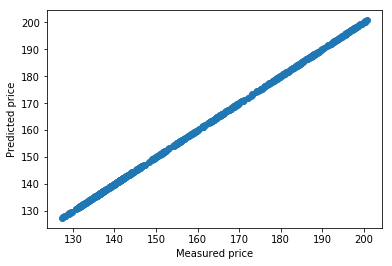

In [18]:
plt.scatter(c, predicted)
plt.xlabel('Measured price')
plt.ylabel('Predicted price')
plt.show()


This graph shows us a remarkable correlation between the predicted prices and the actual SPy_close_price values using cross val prediction. This shows, how good our linear regression model is.

Conclusion:

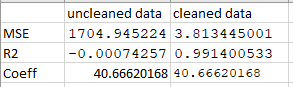

In accordance with the above shown data and the graphs, this data which claims to be predictive of future returns of the SP500 index seems to be about right and consistent.

The performance of the linear regression model after cleaning up off the data is very good. The data is very consistent and  thereby, the signal can be used as a good prdictor of the stock prices.

R-square is defined as the proportion of variance explained by the fit, if the fit is actually worse than just fitting a horizontal line then R-square is negative. Thereby, the negative value of r-squared before cleaning the data indicate that the data had some outliers which impacted the rsquared value and the plot as well. But the positive r squared value of 0.9914,  after the clean up indicates that the data is now consistent and has a excellent fit. 

Furthermore, The value of Mean Squared Error before the clean up of data was very large. MSE = 1704.94. This indicates that there is a lot of loss in our function i.e. the uncleaned data. But, The very low value of MSE = 3.813 after the clean up of data indicates that the cleaned up data is consistent and has less loss.

The coefficent of correlation value remains the same before and after the clean up of data.
The value is coef_ = 40.667 

The value of coefficient of correlation is significantly above 0 which strongly implies that there is significant correlation between the data obtained for signal and Spy_close_price. 
